# Assignment 1: The transient response of a river aquifer to rainfall

In class we considered the charging and discharging of a model aquifer fed by rainfall rate $R$.  The aquifer spans the distance between the river, at $x = 0$, and the drainage divide at $x = L$.  

As discussed in class, the equation governing the transient response of the aquifer is $$\phi\frac{\partial h}{\partial t} = u_b \frac{\partial}{\partial x}\left(h\frac{\partial h}{\partial x}\right) + R,$$ where $\phi$ is the porosity of the aquifer (assumed constant), $h(x,t)$ is the depth of the groundwater surface which can vary in space $x$ and time $t$, $u_b = k\rho g/\mu$ is the buoyancy velocity in the aquifer which is here written in terms of the permeability $k$, the density of water $\rho$, gravitational acceleration $g$ and the dynamic viscosity of water $\mu$.

In addition to specifying the evolution of the groundwater surface, we require that the height of the aquifer at the river is zero and further specify that there is no flux of fluid through the drainage divide, $$h(0,t) = 0 \quad \mbox{and} \quad q(L,t) = \left.-u_b h\frac{\partial h}{\partial x}\right|_{x = L} = 0.$$

### Numerical preliminaries

Evaluate the following cell first to load various packages which will be useful for completing this assignment.

In [2]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

### Sketch of the aquifer geometry

Make a sketch of the model geometry, being careful to include axes and label all relevant quantities.  You should provide a succinct caption to your model sketch.

In [3]:
from IPython.display import Image

# Display the image
Image(url="https://github.com/peter-adepoju/AIMS-Courses/raw/main/geophysical_fluid_dynamics/River.jpeg")

### Derivation of the Transient Response Equation for a Model Aquifer

We start with the governing principles: Darcy's law for flow in a porous medium:.

$$\mu\, u_D = k \Bigl(-\nabla p + \rho\,g)  \tag{1}$$   

where
- $u_D$ is the Darcy velocity (volumetric flux per unit area),
- $p$ is the fluid pressure,
- $\rho$ is the density of water,
- $g$ is the acceleration due to gravity,
- $\mu$ is the dynamic viscosity, and
- $k$ is the permeability.

Define the vertical coordinate $y$ (with $y$ increasing upward) and let the free surface of the groundwater be at $y = h(x,t)$ (where the atmospheric pressure is zero).

#### **Vertical Flow via Darcy's Law**
For vertical flow, the balance between pressure and gravity is given by:
$$
0 = -\frac{\partial p}{\partial y} - \rho\,g.  \tag{2}
$$
Integrate with respect to $y$:
$$
p = -\rho\,g\,y + c.
$$
At the free surface, $y = h(x,t)$, the pressure is zero (gauge):
$$
0 = -\rho\,g\,h(x,t) + c \quad \Rightarrow \quad c = \rho\,g\,h(x,t).
$$
Thus, the pressure distribution becomes:
$$
p(x,y,t) = \rho\,g\,[h(x,t) - y].
$$
Taking the partial derivative of $p$ with respect to $x$ (noting that $y$ is independent of $x$):
$$
\frac{\partial p}{\partial x} = \rho\,g\,\frac{\partial h}{\partial x} \tag{3}
$$

#### **Horizontal Flow via Darcy's Law**

Darcy's law in the $x$-direction (where gravity does not contribute) is:
$$
- \mu\,u_D = k\left(-\frac{\partial p}{\partial x}\right).
$$
The negative sign of $u_D$ indicates that it is in the opposite direction of $x$ axis.

Substitute the pressure gradient:
$$
u_D = \frac{k}{\mu}\,\rho\,g\,\frac{\partial h}{\partial x} \tag{4}
$$

#### **Volume Flux**

The horizontal volume flux per unit width is the product of the water-table height and the Darcy velocity:
$$
q(x,t) = \int_0^h u_D(x,t) \, \partial y \Rightarrow h(x,t)\,u_D(x,t) \tag{5}
$$
$$
q(x,t) = \frac{k\,\rho\,g}{\mu}\,h(x,t)\,\frac{\partial h}{\partial x} \tag{6}
$$
Defining the buoyancy velocity as:
$$
u_b = \frac{k\,\rho\,g}{\mu},
$$
we can write:
$$
q(x,t) = u_b\,h(x,t)\,\frac{\partial h}{\partial x} \tag{7}
$$

#### **Conservation of Mass**

Consider a small control volume between $x$ and $x+\delta x$ over a time interval $\delta t$. The change in water volume must equal the net inflow plus the rainfall recharge $R(t)$:
$$
\Bigl[q(x+\delta x,t) - q(x,t)\Bigr]\,\delta t + R(t)\,\delta x\,\delta t = \phi\,\delta h\,\delta x, \tag{8}
$$
where $\phi$ is the porosity and $\delta h$ is the change in water-table height.

Divide by $\delta x\,\delta t$ and take the limit as $\delta x,\,\delta t\to 0$:
$$
\frac{\partial q}{\partial x} + R(t) = \phi\,\frac{\partial h}{\partial t} \tag{9}
$$

Substitute the expression for $q(x,t)$:
$$
\frac{\partial}{\partial x}\left( u_b\,h\,\frac{\partial h}{\partial x} \right) + R(t) = \phi\,\frac{\partial h}{\partial t} \tag{10}
$$

Rearrange the equation to obtain:
$$
\phi\,\frac{\partial h}{\partial t} = R(t) + u_b\,\frac{\partial}{\partial x}\left( h\,\frac{\partial h}{\partial x} \right) \tag{11}
$$

#### **Boundary Conditions**
The system is subject to the following boundary conditions:
- **At the river ($x = 0$)**: The groundwater surface is at the river level:
  $$
  h(0,t) = 0.
  $$
- **At the drainage divide ($x = L$)**: There is no flux of water:
  $$
  q(L,t) = -u_b\,h(L,t)\,\frac{\partial h}{\partial x}\Big|_{x = L} = 0.
  $$


### General scaling

Scale the governing equation and boundary conditions, and hence find a non-dimensional form of the evolution equation.

## **Solution**

From the governing equation $(11)$;

- **Horizontal coordinate:** Let $L$ be the characteristic length of the aquifer (from the river at $x=0$ to the drainage divide at $x=L$). We define
   $$
   \tilde{x} \;=\; \frac{x}{L}, \tag{12}
   $$
   so that $\tilde{x}\in [0,1]$.

- **Water-table height:** Let $H$ be a characteristic water-table height. We define
   $$
   \tilde{h} \;=\; \frac{h}{H} \tag{13}
   $$
   Then $\tilde{h}$ is dimensionless.

- **Time:** Let $T$ be a characteristic timescale . We define
   $$
   \tilde{t} \;=\; \frac{t}{T} \tag{14}
   $$

Taking the derivatives from equation $(11)$ one after the other. 

- Starting with this: $\frac{\partial}{\partial x}\left( h\,\frac{\partial h}{\partial x} \right)$:

  $$
  \frac{\partial h}{\partial x}
  \;=\;
  \frac{\partial (H \,\tilde{h})}{\partial x}
  \;=\;
  H \,\frac{\partial \tilde{h}}{\partial x}
  \;=\;
  H \,\frac{\partial \tilde{h}}{\partial (\tilde{x}L)}
  \;=\;
  \frac{H}{L} \,\frac{\partial \tilde{h}}{\partial \tilde{x}} \tag{15}
  $$

Multiply equation $(15)$ by $h$ to have:
  $$
  h \,\frac{\partial h}{\partial x}
  \;=\;
  (H\,\tilde{h}) \,\Bigl(\tfrac{H}{L}\,\tfrac{\partial \tilde{h}}{\partial \tilde{x}}\Bigr)
  \;=\;
  \frac{H^2}{L}\,\tilde{h}\,\frac{\partial \tilde{h}}{\partial \tilde{x}} \tag{16}
  $$

Take the derivative of $(h\,\frac{\partial h}{\partial x})$ with respect to $x$ in equation $(16)$ to have:
  $$
  \frac{\partial}{\partial x}\Bigl(h\,\frac{\partial h}{\partial x}\Bigr)
  \;=\;
  \frac{\partial}{\partial x}
   \Bigl(\tfrac{H^2}{L}\,\tilde{h}\,\tfrac{\partial \tilde{h}}{\partial \tilde{x}}\Bigr)
  \;=\;
  \frac{H^2}{L^2}\,\frac{\partial}{\partial \tilde{x}}
   \Bigl(\tilde{h}\,\frac{\partial \tilde{h}}{\partial \tilde{x}}\Bigr) \tag{17}
  $$

- Now for $\frac{\partial h}{\partial t}$:

$$
\frac{\partial h}{\partial t}
\;=\;
\frac{\partial (H\,\tilde{h})}{\partial t}
\;=\;
H \,\frac{\partial \tilde{h}}{\partial t}
\;=\;
H \,\frac{\partial \tilde{h}}{\partial (\tilde{t}\,T)}
\;=\;
\frac{H}{T}\,\frac{\partial \tilde{h}}{\partial \tilde{t}} \tag{18}
$$

Multiply equation $(17)$ by $\phi$ to have:

$$
\phi \,\frac{\partial h}{\partial t}
\;=\;
u_b \,\frac{\partial}{\partial x}\Bigl(h\,\frac{\partial h}{\partial x}\Bigr)
\;+\;
R.
$$

Substitute equations $(17)$ and $(19)$ into the Governing Equation $(11)$:

$$
\phi \,\biggl(\frac{H}{T}\biggr) \,\frac{\partial \tilde{h}}{\partial \tilde{t}}
\;=\;
u_b \,\biggl(\frac{H^2}{L^2}\biggr)\,
\frac{\partial}{\partial \tilde{x}}
 \Bigl(\tilde{h}\,\frac{\partial \tilde{h}}{\partial \tilde{x}}\Bigr)
\;+\;
R. \tag{20}
$$


### Determine the Timescale $T$

We want the rainfall term $R$ to remain in the dimensionless equation. A natural choice is to balance the time-derivative term with $R$. That is,

$$
\phi \,\frac{H}{T} \;\sim\; R
\quad\Longrightarrow\quad
T \;=\;
\frac{\phi\,H}{R}. \tag{21}
$$

Substitute $T = \tfrac{\phi\,H}{R}$ back into equation $(20)$:

$$
\phi \,\frac{H}{\tfrac{\phi\,H}{R}}\,\frac{\partial \tilde{h}}{\partial \tilde{t}}
\;=\;
u_b \,\frac{H^2}{L^2}\,
\frac{\partial}{\partial \tilde{x}}
 \Bigl(\tilde{h}\,\frac{\partial \tilde{h}}{\partial \tilde{x}}\Bigr)
\;+\;
R \tag{22}
$$

The factor on the left simplifies to $R\,\frac{\partial \tilde{h}}{\partial \tilde{t}}$, giving

$$
R \,\frac{\partial \tilde{h}}{\partial \tilde{t}}
\;=\;
u_b \,\frac{H^2}{L^2}\,
\frac{\partial}{\partial \tilde{x}}
 \Bigl(\tilde{h}\,\frac{\partial \tilde{h}}{\partial \tilde{x}}\Bigr)
\;+\;
R \tag{23}
$$

Divide through by $R$:

$$
\frac{\partial \tilde{h}}{\partial \tilde{t}}
\;=\;
\underbrace{\frac{u_b \,H^2}{R\,L^2}}_{\displaystyle \alpha}
\,\frac{\partial}{\partial \tilde{x}}
 \Bigl(\tilde{h}\,\frac{\partial \tilde{h}}{\partial \tilde{x}}\Bigr)
\;+\;
1 \tag{24}
$$

Here,
$$
\alpha \;=\;
\frac{u_b \,H^2}{R\,L^2} \tag{25}
$$


### Scale the Boundary Conditions

1. **River boundary $(x=0)$**  
   We have $h(0,t)=0$. In dimensionless form:
   $$
   H\,\tilde{h}(0,\tilde{t})
   \;=\; 0
   \quad\Longrightarrow\quad
   \tilde{h}(0,\tilde{t}) \;=\; 0 
   $$

2. **Drainage divide $(x=L)$**  
   The no-flux condition $q(L,t) = -u_b\,h\,\frac{\partial h}{\partial x}\big|_{x=L} = 0$ becomes
   $$
   -\,u_b\,\Bigl(H\,\tilde{h}\Bigr)
       \Bigl(\tfrac{H}{L}\,\tfrac{\partial \tilde{h}}{\partial \tilde{x}}\Bigr)\bigg|_{\tilde{x}=1}
   \;=\; 0
   \quad\Longrightarrow\quad
   \tilde{h}(1,\tilde{t}) \,\frac{\partial \tilde{h}}{\partial \tilde{x}}\bigg|_{\tilde{x}=1}
   \;=\; 0.
   $$
   Physically, $\tilde{h}(1,\tilde{t})$ does not have to vanish at $x=L$. Hence the boundary condition typically becomes
   $$
   \frac{\partial \tilde{h}}{\partial \tilde{x}}\bigg|_{\tilde{x}=1}
   \;=\;
   0.
   $$


### Simplify $\alpha$ by Choosing $H$

To eliminate the extra dimensionless group $\alpha$ and set it to 1, we balance the nonlinear diffusion term with $R$:

$$
u_b \,\frac{H^2}{L^2}
\;\sim\;
R
\quad\Longrightarrow\quad
H
\;=\;
L \,\sqrt{\frac{R}{u_b}} \tag{26}
$$

Substituting $H$ into $\alpha$:

$$
\alpha
\;=\;
\frac{u_b \,\bigl(L \sqrt{\tfrac{R}{u_b}}\bigr)^2}{R\,L^2}
\;=\;
\frac{u_b \,L^2 \,\tfrac{R}{u_b}}{R\,L^2}
\;=\;
1 \tag{27}
$$

Thus, equation $(24)$ reduces to:
$$
\frac{\partial \tilde{h}}{\partial \tilde{t}}
\;=\;
\frac{\partial}{\partial \tilde{x}}
 \Bigl(\tilde{h}\,\frac{\partial \tilde{h}}{\partial \tilde{x}}\Bigr)
\;+\;
1 \tag{28}
$$

And we have:
- **Height scale**: 
  $$
  H
  \;=\;
  L \,\sqrt{\frac{R}{u_b}}, \tag{29}
  $$
- **Timescale**:
  $$
  T
  \;=\;
  \frac{\phi \,H}{R}
  \;=\;
  \frac{\phi\,L}{R}\,\sqrt{\frac{R}{u_b}}
  \;=\;
  \frac{\phi\,L}{\sqrt{R\,u_b}} \tag{30}
  $$

Hence, our final dimensionless system is:
$$
\begin{cases}
\dfrac{\partial \tilde{h}}{\partial \tilde{t}}
\;=\;
\dfrac{\partial}{\partial \tilde{x}}
 \Bigl(\tilde{h}\,\dfrac{\partial \tilde{h}}{\partial \tilde{x}}\Bigr)
\;+\;
1,\\[1em]
\tilde{h}(0,\tilde{t})
\;=\;
0,
\quad
\dfrac{\partial \tilde{h}}{\partial \tilde{x}}\bigg|_{\tilde{x}=1}
\;=\;
0.
\end{cases}
$$

### Steady-state aquifer profile

Derive the steady-state, non-dimensional aquifer profile and plot the profile.  

## **Solution**

Starting with the non-dimensional form of the governing equation $(28)$, we focus on the steady state where the time derivative is zero:
$$
0 = \frac{\partial}{\partial \tilde{x}} \Bigl( \tilde{h}\,\frac{\partial \tilde{h}}{\partial \tilde{x}} \Bigr) + 1 \tag{31}
$$

Rewriting this, we have an ordinary differential equation:
$$
\frac{d}{d\tilde{x}} \Bigl( \tilde{h}\,\frac{d\tilde{h}}{d\tilde{x}} \Bigr) = -1 \tag{32}
$$

Integrate both sides with respect to $(\tilde{x})$:
$$
\tilde{h}\,\frac{d\tilde{h}}{d\tilde{x}} = -\tilde{x} + C_1, \tag{33}
$$
where $C_1$ is an integration constant.

### Applying Boundary Conditions

At the drainage divide $(\tilde{x}=1)$, the no-flux condition implies:
$$
\tilde{h}(1)\,\frac{d\tilde{h}}{d\tilde{x}}(1) = 0 \tag{34}
$$
Thus,
$$
0 = -1 + C_1 \quad\Longrightarrow\quad C_1 = 1 \tag{35}
$$
So the integrated equation becomes:
$$
\tilde{h}\,\frac{d\tilde{h}}{d\tilde{x}} = 1 - \tilde{x} \tag{36}
$$

Separate variables:
$$
\tilde{h}\,d\tilde{h} = (1-\tilde{x})\,d\tilde{x} \tag{37}
$$

Integrate both sides:
- The left-hand side yields:
  $$
  \int \tilde{h}\,d\tilde{h} = \frac{\tilde{h}^2}{2} \tag{38}
  $$
- The right-hand side gives:
  $$
  \int (1-\tilde{x})\,d\tilde{x} = \tilde{x} - \frac{\tilde{x}^2}{2} + C_2 \tag{39}
  $$

Thus,
$$
\frac{\tilde{h}^2}{2} = \tilde{x} - \frac{\tilde{x}^2}{2} + C_2 \tag{40}
$$

Apply the river boundary condition, $\tilde{h}(0)=0$, which leads to:
$$
0 = 0 - 0 + C_2 \quad\Longrightarrow\quad C_2 = 0 \tag{41}
$$

Multiply both sides by 2:
$$
\tilde{h}^2 = 2\tilde{x} - \tilde{x}^2 \tag{42}
$$

Taking the positive square root (since the water table height is positive) yields the steady-state profile:
$$
\tilde{h}(\tilde{x}) = \sqrt{2\tilde{x} - \tilde{x}^2} \tag{42}
$$

This is the derived steady-state, non-dimensional aquifer profile.


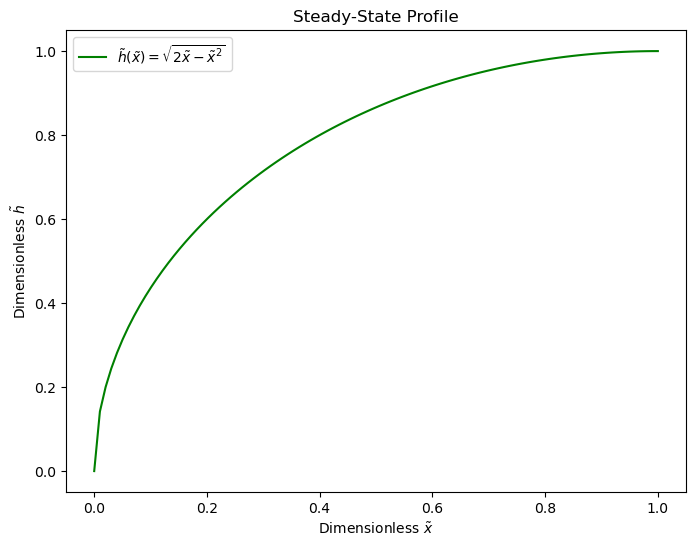

In [4]:
# Generate a dimensionless horizontal coordinate from 0 to 1
x_norm = np.linspace(0, 1, 100)

# The non-dimensional aquifer profile: 𝜏h(𝜏x) = sqrt(2𝜏x - 𝜏x²)
h_norm = np.sqrt(2 * x_norm - x_norm**2)

# Plot the derived profile
plt.figure(figsize=(8, 6))
plt.plot(x_norm, h_norm, label=r'$\tilde{h}(\tilde{x}) = \sqrt{2\tilde{x} - \tilde{x}^2}$', color='green')
plt.xlabel(r'Dimensionless $\tilde{x}$')
plt.ylabel(r'Dimensionless $\tilde{h}$')
plt.title('Steady-State Profile')
plt.legend()
plt.show()

### Flux-conserving scheme

You are provided with a numerical code which solves the porous gravity current equation below.  It is written using a flux conserving scheme (see Wednesday's practical - Jupyter Notebook for details) but without rainfall.  You will see in the code below that you also need to either verify or modify the boundary conditions at the river and the drainage divide.  Adapt this code to solve the PDE governing the evolution of the aquifer with rainfall, and with the boundary conditions specified above. Hence evaluate the flux into the river as a function of time.  You should write a succinct description of the numerical scheme.

[_Note that I have used a grid with just 20 points.  It is a good idea to use a coarse grid when you are trying to get a program to work so that the run time is short.  Once you are confident that the code is working, you can increase the resolution by increasing the number of grid points._]

Start with an initially empty aquifer, $h(x,0) = 0$, with fixed rainfall rate and numerically integrate forwards until an approximate steady state has been reached.  Find the approach to the steady-state profile, by plotting the height of the aquifer at regular time intervals.

Numerically evaluate and plot the river flux as a function of time.  

Once you have done these two steps, follow the questions in the remaining sections to assess the scaling relationships discussed in class with your code.

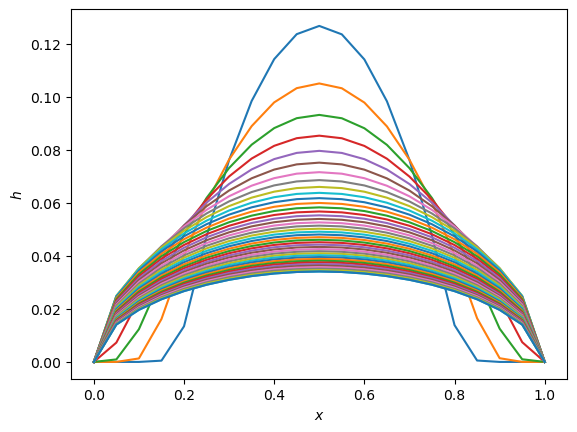

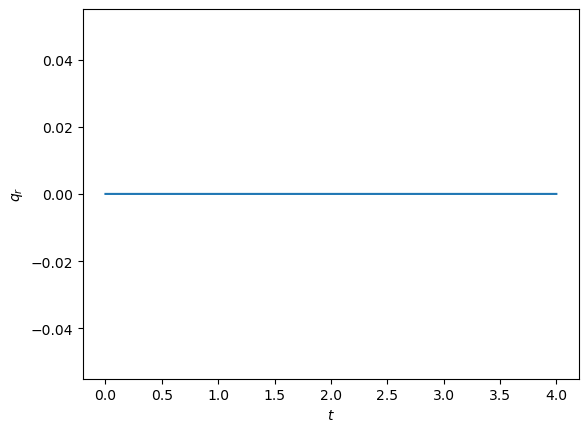

16001


In [12]:
# Setup the numerical simulation
N = 20         # number of points
dx = 1/N       # grid size
dt = 0.1*dx**2 # time step

# end time for integration
t_final = 4

# plotting interval
dt_plot = 0.1
t_plot = dt_plot

# define numerical domain
x = np.arange(0,1+dx,dx) # Numerical grid on fixed domain x = [0,1]

# set initial time and current, h0, and future, h1, profiles
t = 0
h0 = np.fmax(np.sin(3.14*x)-.8,0) # for illustration only.  you should delete this line once you have modified your code
#h0 = np.zeros(x.size) # this is the appropriate initial condition for the aquifer rainfall problem
h1 = h0  # Initializes h1 at the same size as h0

# timestepping
count = 0
time = 0
qr = 0  # flux into river
while t < t_final:

    # Boundary condition at the river (verify this is the correct boundary condition)
    h1[0] = 0

    # evolve the interior of the groundwater profile (note, as given this does not include rainfall)
    for i in range(1, N):
        h1[i] = h0[i] + (dt/2/dx**2)*(h0[i-1]**2 -2*h0[i]**2 + h0[i+1]**2)

    # Boundary condition at the drainage divide (you need to change this)
    h1[N] = 0 
    
    # update time, profile and counter
    t = t + dt
    h0 = h1
    count = count+1

    # record time and river flux
    time = np.append(time,t)
    qr = np.append(qr,0)  # replace the "0" in this expression with a discrete expression for the river flux at x = 0

    # plot
    if t > t_plot: 
        plt.plot(x,h0)
        t_plot = t_plot + dt_plot
    
# steady state profile for comparison
# it's worth calculating the steady-state profile to compare with your transient numerical solution.

plt.plot(x, h0)
plt.xlabel("$x$")
plt.ylabel("$h$")
plt.show()

plt.plot(time,qr)
plt.xlabel("$t$")
plt.ylabel("$q_r$")
plt.show()

print(count)

### My code for determining the filling of the aquifer

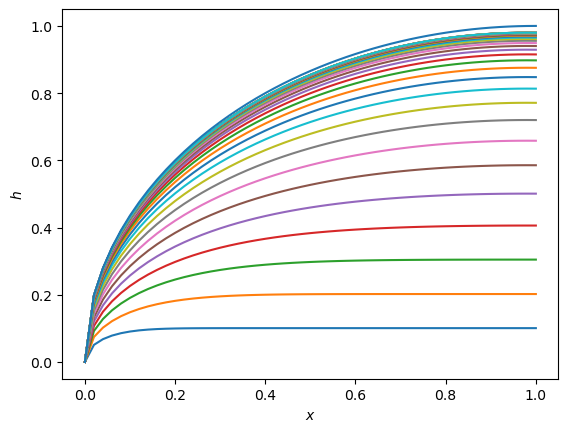

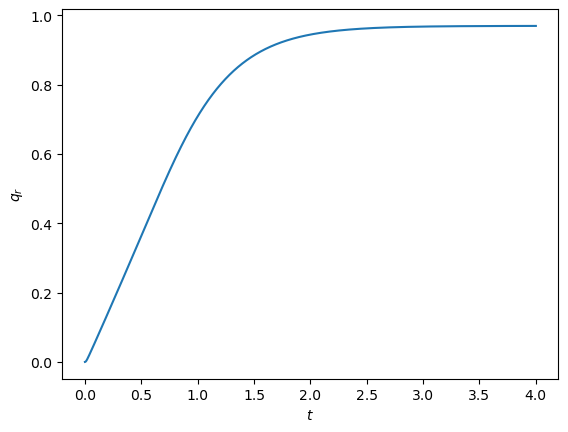

Number of timestep: 100001


In [5]:
# Setup the numerical simulation
N = 50         # number of points
dx = 1/N       # grid size
dt = 0.1*dx**2 # time step

# end time for integration
t_final = 4

# plotting interval
dt_plot = 0.1
t_plot = dt_plot

# define numerical domain
x = np.arange(0,1+dx,dx) # Numerical grid on fixed domain x = [0,1]

# set initial time and current, h0, and future, h1, profiles
t = 0
#h0 = np.fmax(np.sin(3.14*x)-.8,0) # for illustration only.  you should delete this line once you have modified your code
h0 = np.zeros(x.size) # this is the appropriate initial condition for the aquifer rainfall problem
h1 = h0  # Initializes h1 at the same size as h0

# timestepping
count = 0
time = 0
qr = 0  # flux into river
while t < t_final:

    # Boundary condition at the river (verify this is the correct boundary condition)
    h1[0] = 0

    # evolve the interior of the groundwater profile (note, as given this does not include rainfall)
    for i in range(1, N):
        h1[i] = h0[i] + (dt/2/dx**2)*(h0[i-1]**2 -2*h0[i]**2 + h0[i+1]**2) + dt

    # Boundary condition at the drainage divide (you need to change this)
    h1[N] = h1[N-2]

    # update time, profile and counter
    t = t + dt
    h0 = h1
    count = count+1

    # record time and river flux
    flux = (h1[0] + h1[1]) * (h1[1] - h1[0]) / (2*dx)
    time = np.append(time,t)
    qr = np.append(qr, flux)  # replace the "0" in this expression with a discrete expression for the river flux at x = 0

    # plot
    if t > t_plot:
        plt.plot(x,h0)
        t_plot = t_plot + dt_plot

# steady state profile for comparison
# it's worth calculating the steady-state profile to compare with your transient numerical solution.
    h = np.sqrt(2*x - x**2)

plt.plot(x, h)
plt.xlabel("$x$")
plt.ylabel("$h$")
plt.show()

plt.plot(time,qr)
plt.xlabel("$t$")
plt.ylabel("$q_r$")
plt.show()

print("Number of timestep:", count)

### Evaluating your numerical solution: the early-time regime: $R \neq 0$

Write a brief summary of the scaling argument for the early self-similar evolution of the groundwater aquifer.   

Compare your numerical solution against the prediction of the scaling analysis by  plotting $h/h_{scale}$ versus $x/x_{scale}$ for at least 5 **early** times, where $h_{scale}$ and $x_{scale}$ are the height and length scales given by the early-time self-similar scaling behaviour.

## **Solution**

We begin with the governing equation for the water-table evolution:
$$
\phi \frac{\partial h}{\partial t} = u_b \frac{\partial}{\partial x} \left( h \frac{\partial h}{\partial x} \right) + R \tag{1}
$$

To analyze the early self-similar behavior, we introduce characteristic scales:
- $H$: typical water-table height,
- $T$: typical time scale,
- $X$: typical horizontal length scale.

We then express the variables in dimensionless form:
$$
h = H\,\tilde{h}, \quad x = X\,\tilde{x}, \quad t = T\,\tilde{t} \tag{2}
$$

When we substitute these scalings into the governing equation, the terms scale as follows:
- **Time derivative:**
  $$
  \phi \frac{\partial h}{\partial t} \sim \phi\,\frac{H}{T} \tag{3}
  $$
- **Nonlinear diffusion term:**
  $$
  u_b \frac{\partial}{\partial x} \left( h \frac{\partial h}{\partial x} \right) \sim u_b\,\frac{H^2}{X^2} \tag{4}
  $$
- **Rainfall term:** \(R\).

Assuming that these contributions are of comparable magnitude leads to
$$
\frac{\phi H}{T} \sim \frac{u_b H^2}{X^2} \sim R \tag{5}
$$

### Deriving the Characteristic Scales

**Time Scale \(T\):**

   Equate the time derivative with the rainfall term:
   $$
   \frac{\phi H}{T} \sim R \quad \Longrightarrow \quad T \sim \frac{\phi H}{R} \tag{6}
   $$

**Horizontal Scale \(X\):**

   Equate the diffusion term with the rainfall term:
   $$
   \frac{u_b H^2}{X^2} \sim R \quad \Longrightarrow \quad X^2 \sim \frac{u_b H^2}{R},
   $$
   which gives
   $$
   X \sim H \sqrt{\frac{u_b}{R}} \tag{7}
   $$

Thus, we also have an expression for the horizontal scale in terms of \(T\) by substituting \(H \sim \frac{T R}{\phi}\):
$$
X_{\text{scale}} \sim \frac{T R}{\phi} \sqrt{\frac{u_b}{R}} \tag{8}
$$

### Non-Dimensional Characteristics

The scaling relations can be summarized by writing:
$$
h = \tilde{h}\,H, \quad x = \tilde{x}\,X, \quad t = \tilde{t}\,T.
$$

It follows that the non-dimensional ratios are:
$$
\frac{h}{H_{\text{scale}}} = \frac{\phi h}{R t} = \frac{\tilde{h}}{\tilde{t}}
$$
and
$$
\frac{x}{X_{\text{scale}}} = \frac{\tilde{x}\,L}{\left(\frac{R}{\phi}\sqrt{\frac{u_b}{R}}\right)t} = \frac{\tilde{x}}{\tilde{t}}
$$

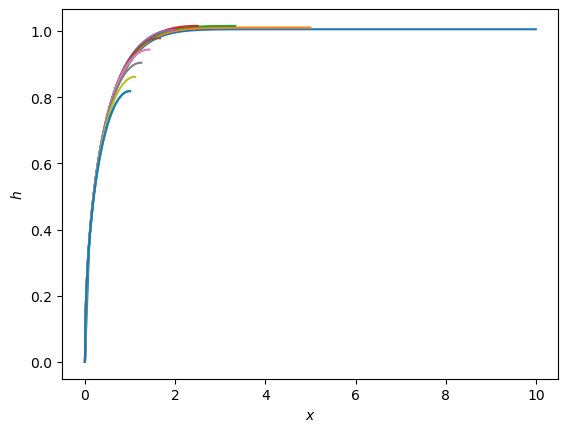

Number of timesteps: 100001


In [6]:
# Setup the numerical simulation
N = 100         # number of points
dx = 1/N       # grid size
dt = 0.1*dx**2 # time step

# end time for integration
t_final = 1

# plotting interval
dt_plot = 0.1
t_plot = dt_plot

# define numerical domain
x = np.arange(0,1+dx,dx) # Numerical grid on fixed domain x = [0,1]

# set initial time and current, h0, and future, h1, profiles
t = 0
#h0 = np.fmax(np.sin(3.14*x)-.8,0) # for illustration only.  you should delete this line once you have modified your code
h0 = np.zeros(x.size) # this is the appropriate initial condition for the aquifer rainfall problem
h1 = h0  # Initializes h1 at the same size as h0

# timestepping
count = 0
time = 0
qr = 0  # flux into river
while t < t_final:

    # Boundary condition at the river (verify this is the correct boundary condition)
    h1[0] = 0

    # evolve the interior of the groundwater profile (note, as given this does not include rainfall)
    for i in range(1, N):
        h1[i] = h0[i] + (dt/2/dx**2)*(h0[i-1]**2 -2*h0[i]**2 + h0[i+1]**2) + dt

    # Boundary condition at the drainage divide (you need to change this)
    h1[N] = h1[N-2] 
    
    # update time, profile and counter
    t = t + dt
    h0 = h1
    count = count+1

    # record time and river flux
    flux = (h1[1]**2 - h1[0]**2)/ 2 * dx
    time = np.append(time,t)
    qr = np.append(qr, flux)  # replace the "0" in this expression with a discrete expression for the river flux at x = 0

    # plot
    if t > t_plot: 
        plt.plot(x/t,h0/t)
        t_plot = t_plot + dt_plot
    
# steady state profile for comparison
# it's worth calculating the steady-state profile to compare with your transient numerical solution.

plt.plot(x/t, h0/t)
plt.xlabel("$x$")
plt.ylabel("$h$")
plt.show()

print("Number of timesteps:", count)

### Evaluating the numerical solution: aquifer drawdown: $R = 0$

Write a brief summary of the scaling argument for the behaviour of the groundwater aquifer once the rain has stopped, $R = 0$.  Modify your numerical solution to start with the groundwater aquifer in the steady-state balance between rainfall and flux into the river (reviewed above), and subsequently calculate the decay of the aquifer height and river flux.  Again, plot your results using a suitable rescaling of the aquifer height to demonstrate collapse to a self-similar profile.  Compare the scaling of the numerically calculated river flux as a function of time to the results of your scaling analysis.

## **Solution**

Once the rainfall is switched off (i.e. $R=0$), the governing equation reduces to:
$$
\phi \frac{\partial h}{\partial t} = u_b \frac{\partial}{\partial x}\left( h\, \frac{\partial h}{\partial x} \right),
$$
and the evolution is controlled by the balance between the storage term and the nonlinear diffusion term.

The numerical solution is modified by starting with the aquifer in the steady state established under constant rainfall. That is, the initial water-table profile is given by:
$$
h_{ss}(x) = \sqrt{2x - x^2},
$$
which represents the balance between rainfall recharge and the lateral flux into the river.

After the rainfall stops, the aquifer drains via lateral diffusion. Our scaling analysis (with $R=0$) shows that the dominant balance becomes
$$
\phi\, \frac{H}{T} \sim u_b\, \frac{H^2}{L^2}.
$$
If the drainage length $L$ is fixed by the geometry (e.g. $L=1$ in nondimensional form), then
$$
H(t) \sim \frac{1}{t}.
$$

Similarly, the river flux, scaling as
$$
q_r \sim h\, \frac{\partial h}{\partial x} \sim H(t)^2,
$$
decays as
$$
q_r(t) \sim \frac{1}{t^2}.
$$

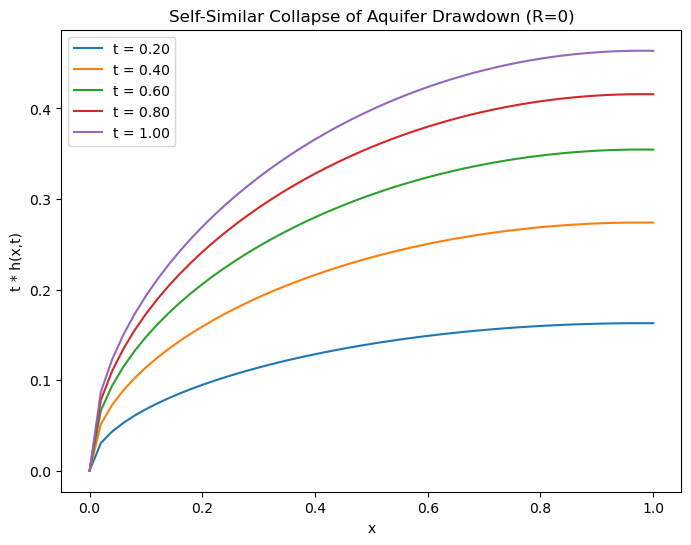

In [15]:
# Setup the simulation parameters
N = 50                   # number of grid points
dx = 1.0 / N             # grid spacing
dt = 0.1 * dx**2         # time step
t_final = 4              # final time for integration

# Define numerical domain: x in [0,1]
x = np.arange(0, 1 + dx, dx)

# Initial condition: start with the steady-state profile
h0 = np.sqrt(2 * x - x**2)  # steady state: h_ss = sqrt(2x - x^2)
h1 = np.copy(h0)

# For saving profiles at early times (for self-similar collapse)
early_times = [0.2, 0.4, 0.6, 0.8, 1.0]  # chosen early times
saved_profiles = {}

# Lists to store time and river flux data
time_list = []
flux_list = []

t = 0.0
while t < t_final:
    # Boundary condition at the river: h(0,t)=0
    h1[0] = 0

    # Evolve the interior (R=0: no rainfall term)
    for i in range(1, N):
        h1[i] = h0[i] + (dt/(2*dx**2)) * (h0[i-1]**2 - 2*(h0[i]**2) + h0[i+1]**2)

    # Drainage divide: enforce zero gradient at x = 1 (h[N] = h[N-2])
    h1[N] = h1[N-2]

    # Update time and solution
    t += dt
    h0 = np.copy(h1)

    # Compute river flux using a centered difference at x = 0:
    # Here, q_r = - u_b h * h_x, and with u_b=1 in our nondimensionalization.
    flux = - ((h1[1] - h1[0]) / dx) * ((h1[0] + h1[1]) / 2.0)
    time_list.append(t)
    flux_list.append(flux)

    # Save profiles at specified early times for self-similar collapse
    for t_save in early_times:
        if (t - dt < t_save) and (t >= t_save) and (t_save not in saved_profiles):
            saved_profiles[t_save] = np.copy(h1)

# Plot the self-similar collapse of the aquifer profile.
# Scaling prediction: h(x,t) ~ 1/t, so plotting t * h(x,t) should collapse profiles.
plt.figure(figsize=(8,6))
for t_save in sorted(saved_profiles.keys()):
    h_profile = saved_profiles[t_save]
    plt.plot(x, t_save * h_profile, label=f't = {t_save:.2f}')
plt.xlabel('x')
plt.ylabel('t * h(x,t)')
plt.title('Self-Similar Collapse of Aquifer Drawdown (R=0)')
plt.legend()
plt.show()

### Aquifer response to variable rainfall: $R = R(t)$

Now calculate the response to variable rainfall, using the dimensionless rainfall rate given below.  You should plot the rainfall rate and the river flux as a function of time (preferably on the same time axis). Discuss your results.

In [16]:
def R(t): 
    return np.fmax(np.cos(t/.15) + np.sin(t/.8),0)